# Convolutional autoencoder (CAE)

## Required library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras import layers

2021-12-08 20:05:31.550750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 20:05:31.550803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load dataset and normalize data

In [2]:
data = pd.read_csv('Mnist-digit/mnist.csv')
y=data.pop('label')
x=data
x=x.values.reshape((-1,28,28,1)) /255.0 # normalize data

## Train-Test Split

In [3]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
sss.get_n_splits(x, y)
print(sss)

for train_index, test_index in sss.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.33,
            train_size=None)
TRAIN: [30512  3538 40571 ... 31149 25562 30468] TEST: [18527 12538 34481 ... 35846 26037  6952]
TRAIN: [ 4806 20259 31193 ... 30115 26552 19138] TEST: [13022 10452 32436 ... 21135 34707 14791]
TRAIN: [38342 19007  3097 ...  7655 37617 23869] TEST: [23472 36446 29580 ... 25953  6950 38604]
TRAIN: [34245  2197 41386 ... 26851 36067 37364] TEST: [ 4778 16086 27235 ...  3346  6073 35709]
TRAIN: [ 1605 37376 38709 ... 20374 26388 24728] TEST: [21681 14258 24661 ... 40966 17466 22461]


## Define Model

In [4]:
keras.backend.clear_session()

input_img = keras.Input(shape=(28, 28, 1))
## encoder layers
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

## decoder layers ##
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

2021-12-08 20:06:01.655657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-08 20:06:01.664679: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-08 20:06:01.667482: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (920bc14734ab): /proc/driver/nvidia/version does not exist
2021-12-08 20:06:01.688574: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile model

In [5]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Train the convolutional autoencoder

In [6]:
BS = 32
EPOCHS = 25
his = autoencoder.fit(x_train, x_train,
validation_data = (x_test, x_test),
epochs = EPOCHS,
batch_size = BS)

2021-12-08 20:06:10.944122: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
880/880 [==============================] - 77s 83ms/step - loss: 0.1830 - val_loss: 0.1374
Epoch 2/25
880/880 [==============================] - 58s 66ms/step - loss: 0.1285 - val_loss: 0.1211
Epoch 3/25
880/880 [==============================] - 64s 73ms/step - loss: 0.1179 - val_loss: 0.1150
Epoch 4/25
880/880 [==============================] - 50s 57ms/step - loss: 0.1126 - val_loss: 0.1103
Epoch 5/25
880/880 [==============================] - 66s 75ms/step - loss: 0.1091 - val_loss: 0.1073
Epoch 6/25
880/880 [==============================] - 64s 73ms/step - loss: 0.1065 - val_loss: 0.1052
Epoch 7/25
880/880 [==============================] - 63s 72ms/step - loss: 0.1043 - val_loss: 0.1038
Epoch 8/25
880/880 [==============================] - 63s 72ms/step - loss: 0.1027 - val_loss: 0.1022
Epoch 9/25
880/880 [==============================] - 62s 70ms/step - loss: 0.1012 - val_loss: 0.1011
Epoch 10/25
880/880 [==============================] - 50s 57ms/step - loss: 0.100

## Present Results

#### plot diagnostic learning curves

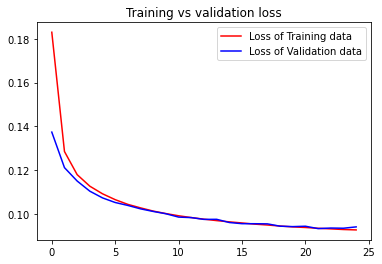

<Figure size 432x288 with 0 Axes>

In [7]:
get_loss = his.history['loss']
validation_loss = his.history['val_loss']
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

The training process has been stable and shows no signs of over-adjustment.

In [8]:
## reconstructed images

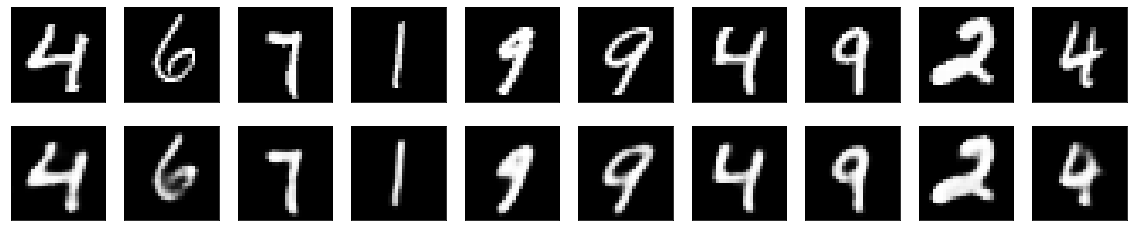

In [10]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
plt.gray()
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The autoencoder was able to reconstruct the image correctly.